In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

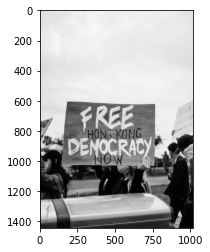

In [2]:
img = cv.cvtColor(cv.imread("hong.png"), cv.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")

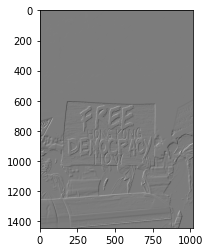

In [3]:
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)
img2 = cv.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
plt.imshow(img2, cmap="gray")

In [4]:
def nothing(x):
    pass
# читаем исходное изображение
img3 = img.copy()
# меняем его размер, иначе оно на пол экрана
width = int(img3.shape[1] * 0.5)
height = int(img3.shape[0] * 0.5)
img3 = cv.resize(img3,(width, height))
cv.namedWindow('canny')
#ползунки
cv.createTrackbar('threshold1','canny',0,1000,nothing)
cv.createTrackbar('threshold2','canny',0,1000,nothing)
while(1):
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
    #получаем значения
    threshold1 = cv.getTrackbarPos('threshold1','canny')
    threshold2 = cv.getTrackbarPos('threshold2','canny')
    #обрабатываем
    edges = cv.Canny(img3, threshold1, threshold2)
    cv.imshow('canny', edges)
cv.destroyAllWindows()

KeyboardInterrupt: 

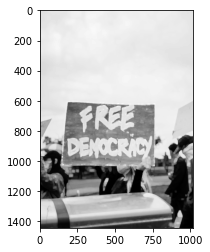

In [5]:
img4 = img.copy()
kernel = np.ones((5,5),np.uint8)
img4 = cv.dilate(img4,kernel,iterations = 2)
plt.imshow(img4, cmap="gray")